In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('stocks_data.csv')

In [3]:
df_aapl = df[df['code'] == 'AAPL']

In [4]:
df_aapl['datetime'] = pd.to_datetime(df_aapl['datetime'])
df_aapl["close"] = pd.to_numeric(df_aapl["close"], errors='coerce')
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
data = df_aapl[['datetime', 'close']]  # Use double brackets to select multiple columns
print(data)

       datetime      close
2    2020-10-29  115.32000
5    2020-10-30  108.86000
12   2020-11-02  108.77000
15   2020-11-03  110.44000
22   2020-11-04  114.95000
...         ...        ...
4975 2024-10-14  231.30000
4981 2024-10-15  233.85001
4985 2024-10-16  231.78000
4991 2024-10-17  232.14999
4995 2024-10-18  235.00000

[1000 rows x 2 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\1321157602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['datetime'] = pd.to_datetime(df_aapl['datetime'])
C:\Users\PC\AppData\Local\Temp\ipykernel_25544\1321157602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl["close"] = pd.to_numeric(df_aapl["close"], errors='coerce')


In [5]:

# Giả sử cột 'Date' là ngày tháng và 'Close' là giá đóng cửa
data['Date'] = pd.to_datetime(df_aapl['datetime'])
data.set_index('Date', inplace=True)

# Chọn cột giá đóng cửa
close_prices = df_aapl['close']


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\2515181810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(df_aapl['datetime'])


In [6]:
import statsmodels.api as sm
print(sm.__version__)


0.14.4


In [7]:
# Đảm bảo cột 'Date' được chuyển đổi thành datetime
# Đặt cột 'Date' làm chỉ số

# Kiểm tra lại index
print(data.index)

DatetimeIndex(['2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11',
               ...
               '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10',
               '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)


In [8]:
# Đặt tần suất cho chỉ số thời gian (ví dụ: hàng ngày)
print(data.isnull().sum())
print(close_prices.isnull().sum())

datetime    0
close       0
dtype: int64
0


3.9.2


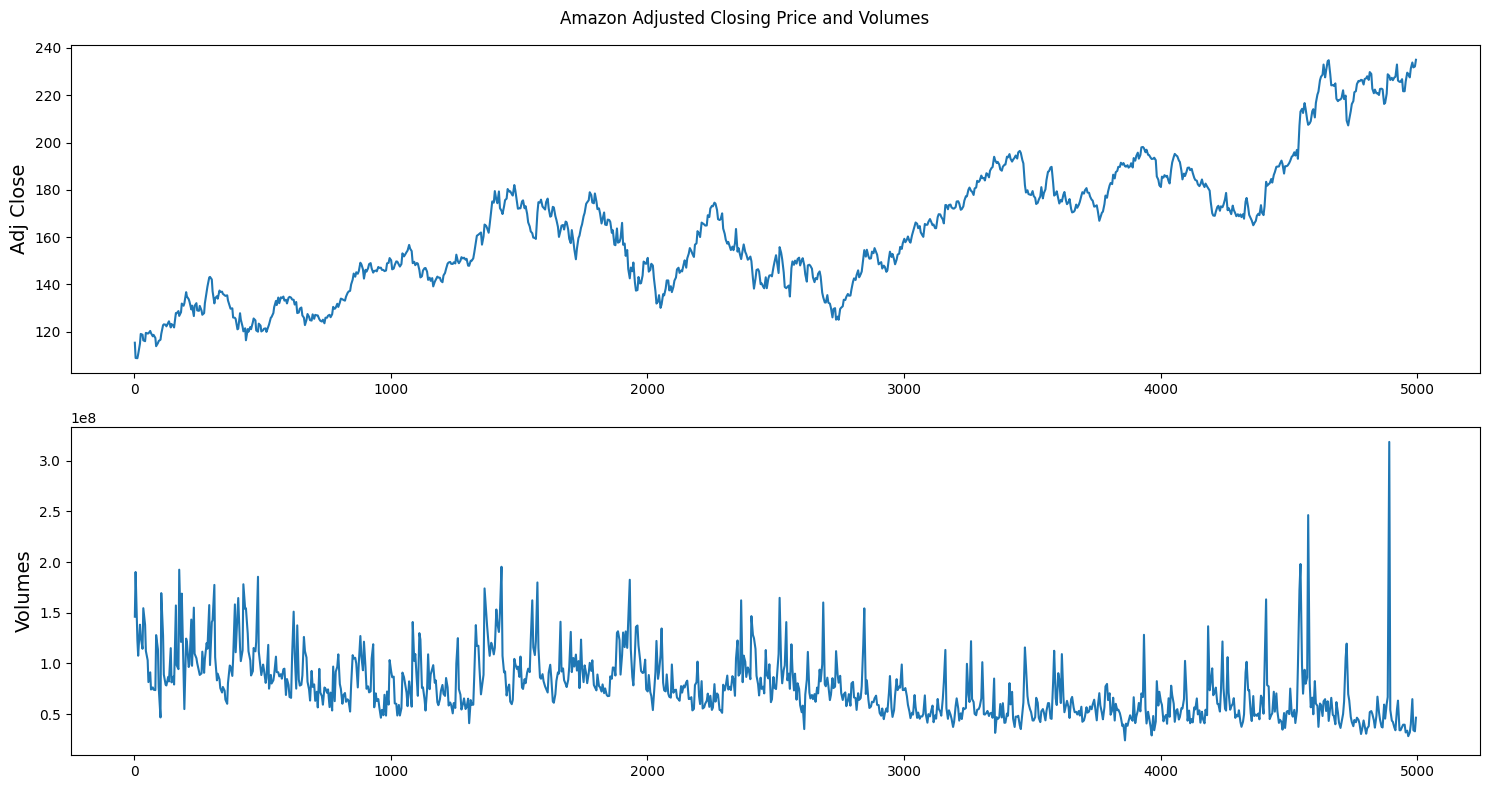

In [9]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)


fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plotting Amazon's adjusted closing price as a line plot:
df_aapl['close'].plot(ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Adj Close',fontsize=14)

# Creating a line plot for Amazon's stock Volumes:
df_aapl['volume'].plot(ax=axes[1])
axes[1].set_ylabel('Volumes', fontsize=14)
axes[1].set_xlabel('')  # to get nothing in x axis as labels

plt.suptitle('Amazon Adjusted Closing Price and Volumes')
plt.tight_layout()
plt.show()

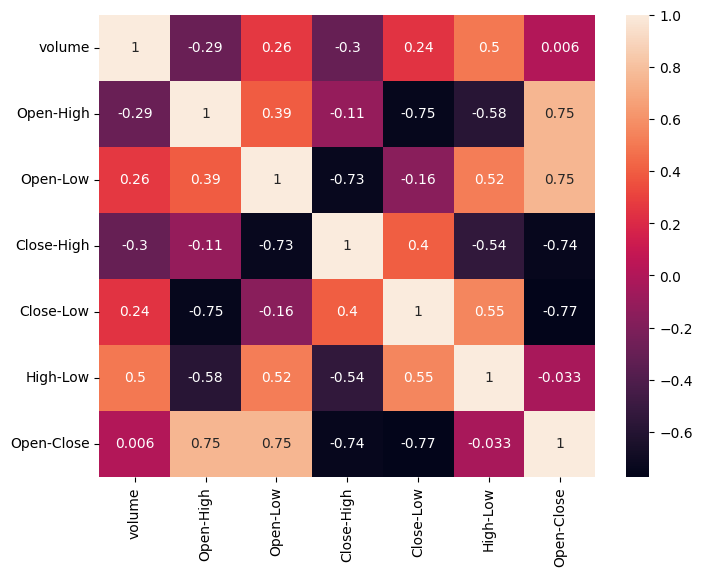

In [10]:
import seaborn as sns
# firstly, we crete a copy of the Amazon datasset:
amazon_corr_df = df_aapl.copy()
amazon_corr_df.reset_index(inplace=True)

# Feature engineering - adding new columns to the new dataset created:
amazon_corr_df['Open-High'] = amazon_corr_df['open']-amazon_corr_df['high']
amazon_corr_df['Open-Low'] = amazon_corr_df['open'] - amazon_corr_df['low']
amazon_corr_df['Close-High'] = amazon_corr_df['close']-amazon_corr_df['high']
amazon_corr_df['Close-Low'] = amazon_corr_df['close'] - amazon_corr_df['low']
amazon_corr_df['High-Low'] = amazon_corr_df['high'] - amazon_corr_df['low']
amazon_corr_df['Open-Close'] = amazon_corr_df['open'] - amazon_corr_df['close']

# Creating a heatmap to visualize the correlation among different Daily price columns for Amazon stocks:
amazon_corr_df2 = amazon_corr_df.copy()
amazon_corr_df2 = amazon_corr_df2.drop(['index', 'id','datetime','open','high','low','close' ,'code' ],axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(amazon_corr_df2.corr(),annot=True)
plt.show()

In [11]:
print(amazon_corr_df2.corr())


              volume  Open-High  Open-Low  Close-High  Close-Low  High-Low  \
volume      1.000000  -0.289741  0.261102   -0.304207   0.242758  0.500226   
Open-High  -0.289741   1.000000  0.392980   -0.113831  -0.746087 -0.581216   
Open-Low    0.261102   0.392980  1.000000   -0.731947  -0.160593  0.519875   
Close-High -0.304207  -0.113831 -0.731947    1.000000   0.402689 -0.541987   
Close-Low   0.242758  -0.746087 -0.160593    0.402689   1.000000  0.550986   
High-Low    0.500226  -0.581216  0.519875   -0.541987   0.550986  1.000000   
Open-Close  0.005956   0.751815  0.751544   -0.740668  -0.771814 -0.033347   

            Open-Close  
volume        0.005956  
Open-High     0.751815  
Open-Low      0.751544  
Close-High   -0.740668  
Close-Low    -0.771814  
High-Low     -0.033347  
Open-Close    1.000000  


0
      trend
2       NaN
5       NaN
12      NaN
15      NaN
22      NaN
...     ...
1801    NaN
1805    NaN
1811    NaN
1815    NaN
1821    NaN

[365 rows x 1 columns]
      seasonal
2     0.998365
5     0.996054
12    1.001730
15    1.003132
22    1.003631
...        ...
1801  0.998365
1805  0.996054
1811  1.001730
1815  1.003132
1821  1.003631

[365 rows x 1 columns]


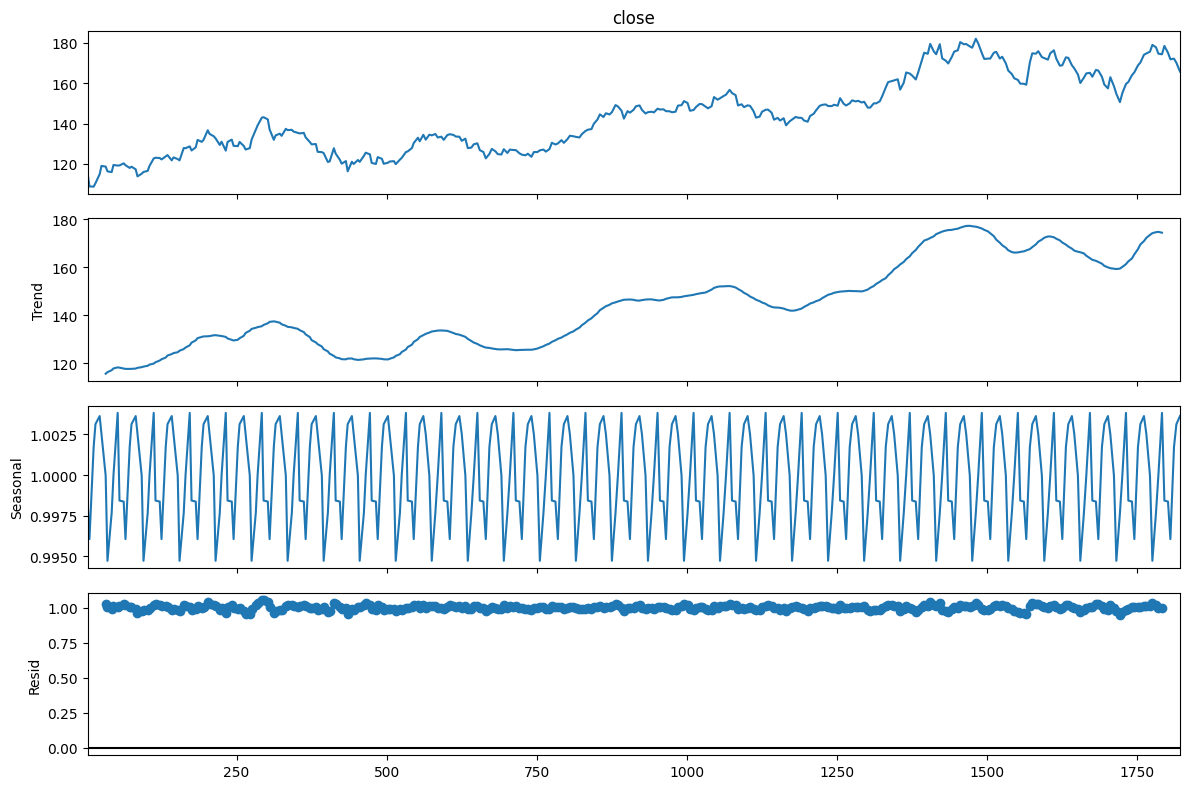

In [12]:
# Specifying the size of canvas for the plot:\\
from statsmodels.tsa.seasonal import seasonal_decompose
# Determining the rolling statistics for Amazon time series -
amazon = df_aapl['close'].head(365)
print(amazon.isnull().sum())
plt.rc("figure", figsize=(12,8))

# Creating the multiplicative decomposition object for a period of 12:
decomposition = seasonal_decompose(amazon, model='multiplicative', period=12)
trend = pd.DataFrame(decomposition.trend)  # Chuyển thành DataFrame
seasonal = pd.DataFrame(decomposition.seasonal)  # Chuyển thành DataFrame
print(trend)
print(seasonal)

# Plotting the decomposition plot:
decomposition.plot()

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:

df_cluster = df_aapl[['open', 'high', 'low', 'close', 'volume']]
print("Kích thước dữ liệu:", df_cluster.shape)
# Kiểm tra các cột trong DataFrame
print("Các cột trong dữ liệu:", df.columns)

# Kiểm tra giá trị thiếu (nếu có)
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Áp dụng KMeans để phân cụm
kmeans = KMeans(n_clusters=2)  # Bạn có thể thay đổi số cụm cho phù hợp
df_aapl['cluster'] = kmeans.fit_predict(df_cluster_scaled)

print(df)

Kích thước dữ liệu: (1000, 5)
Các cột trong dữ liệu: Index(['id', 'datetime', 'open', 'high', 'low', 'close', 'volume', 'code'], dtype='object')
Giá trị thiếu trong dữ liệu:
id          0
datetime    0
open        0
high        0
low         0
close       0
volume      0
code        0
dtype: int64
        id    datetime       open       high        low   close     volume  \
0     4000  2020-10-29  112.37000  116.93000  112.20000  115.32  146129200   
1     5000  2020-10-29  112.37000  116.93000  112.20000  115.32  146129200   
2     1000  2020-10-29  112.37000  116.93000  112.20000  115.32  146129200   
3     2000  2020-10-29  112.37000  116.93000  112.20000  115.32  146129200   
4     3000  2020-10-29  112.37000  116.93000  112.20000  115.32  146129200   
...    ...         ...        ...        ...        ...     ...        ...   
4995     1  2024-10-18  236.17999  236.17999  234.00999  235.00   46416300   
4996  1001  2024-10-18  236.17999  236.17999  234.00999  235.00   46416300   

C:\Users\PC\AppData\Local\Temp\ipykernel_25544\4085910251.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['cluster'] = kmeans.fit_predict(df_cluster_scaled)


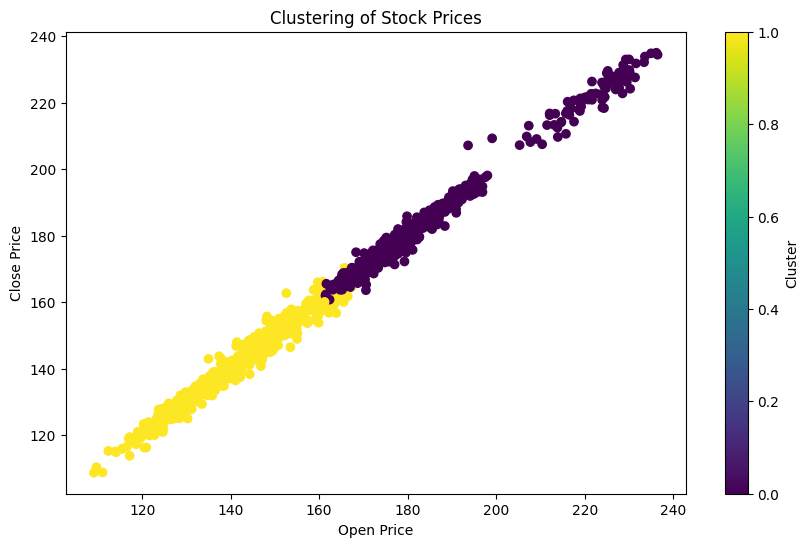

In [15]:
# Giả sử rằng 'df_aapl' có chứa các cột 'open', 'close' và cột 'cluster' sau khi phân cụm
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán với màu sắc dựa trên các cụm
plt.scatter(df_aapl['open'], df_aapl['close'], c=df_aapl['cluster'], cmap='viridis', marker='o')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Clustering of Stock Prices')
plt.colorbar(label='Cluster')

# Hiển thị biểu đồ
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_25544\2362754504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['datetime'] = pd.to_datetime(df_aapl['datetime'])
C:\Users\PC\AppData\Local\Temp\ipykernel_25544\2362754504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['quarter'] = df_aapl['datetime'].dt.quarter
C:\Users\PC\AppData\Local\Temp\ipykernel_25544\2362754504.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

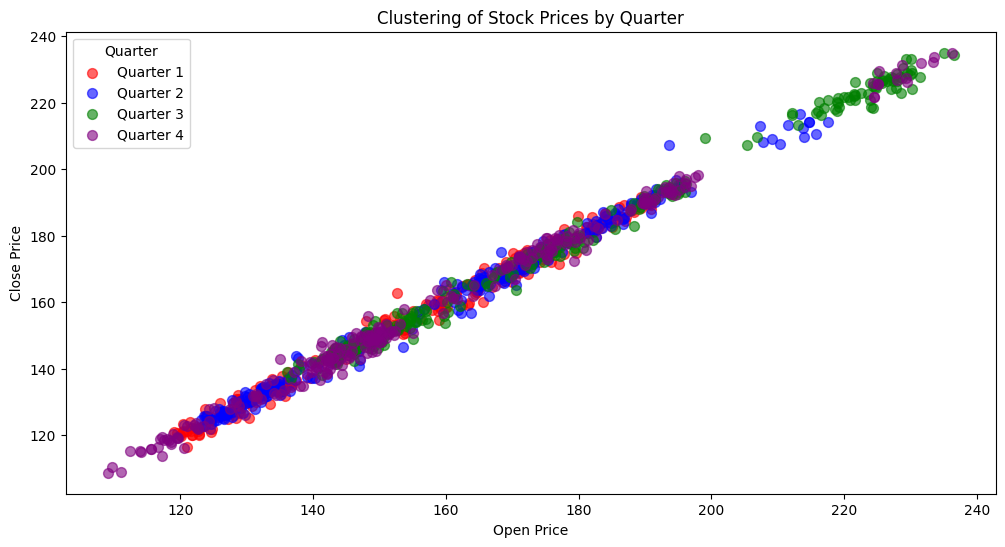

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Tạo cột quý từ cột datetime
df_aapl['datetime'] = pd.to_datetime(df_aapl['datetime'])
df_aapl['quarter'] = df_aapl['datetime'].dt.quarter

# Chuẩn bị dữ liệu phân cụm (chỉ các cột cần thiết)
df_cluster = df_aapl[['open', 'high', 'low', 'close', 'volume']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Áp dụng KMeans để phân cụm vào 4 cụm, đại diện cho 4 quý
kmeans = KMeans(n_clusters=4, random_state=0)
df_aapl['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Vẽ biểu đồ phân cụm dựa trên các quý
plt.figure(figsize=(12, 6))
colors = ['red', 'blue', 'green', 'purple']  # Màu sắc cho các quý

# Lặp qua từng quý để vẽ các cụm
for i in range(1, 5):
    subset = df_aapl[df_aapl['quarter'] == i]
    plt.scatter(subset['open'], subset['close'], 
                color=colors[i-1], label=f'Quarter {i}', alpha=0.6, s=50)

plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Clustering of Stock Prices by Quarter')
plt.legend(title='Quarter')
plt.show()


In [17]:
print(df_aapl['quarter'])

2       4
5       4
12      4
15      4
22      4
       ..
4975    4
4981    4
4985    4
4991    4
4995    4
Name: quarter, Length: 1000, dtype: int32


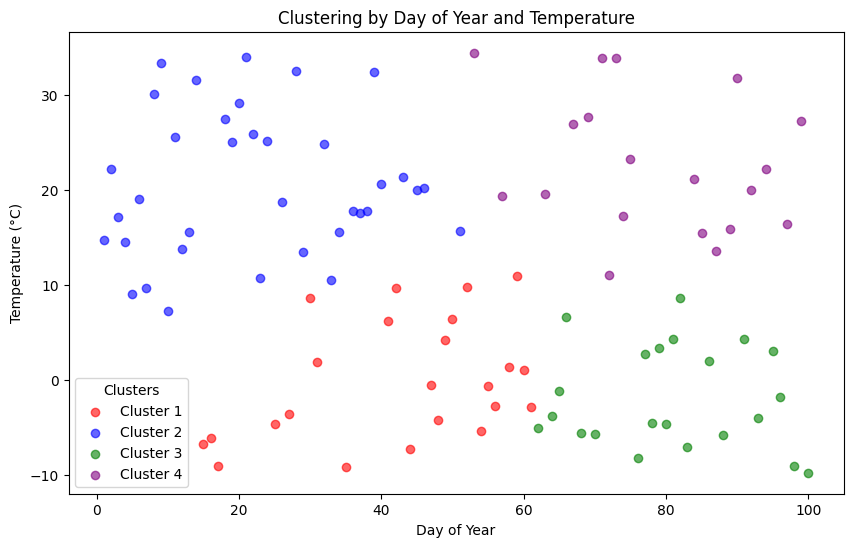

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Đọc dữ liệu từ CSV
df = pd.read_csv('weather_data_sample.csv')

# Chuyển đổi cột 'datetime' thành định dạng datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Thêm cột ngày trong năm (1 - 365)
df['day_of_year'] = df['datetime'].dt.dayofyear

# Chuẩn bị dữ liệu phân cụm: Ngày trong năm và nhiệt độ
df_cluster = df[['day_of_year', 'temperature']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Vẽ biểu đồ phân cụm theo ngày trong năm và nhiệt độ
plt.figure(figsize=(10, 6))

# Duyệt qua các cụm và vẽ từng cụm với màu sắc khác nhau
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    subset = df[df['cluster'] == i]
    plt.scatter(subset['day_of_year'], subset['temperature'], color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Clustering by Day of Year and Temperature')
plt.legend(title='Clusters')
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\2347772995.py:8: FutureWarning: Parsed string "2024-10-25 01:00:00 MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['date_time_local'] = pd.to_datetime(data['date_time_local'], errors='coerce')


0   2024-10-25 01:00:00
1   2024-10-25 00:00:00
2   2024-10-24 23:00:00
3   2024-10-24 22:00:00
4   2024-10-24 21:00:00
Name: date_time_local, dtype: datetime64[ns]


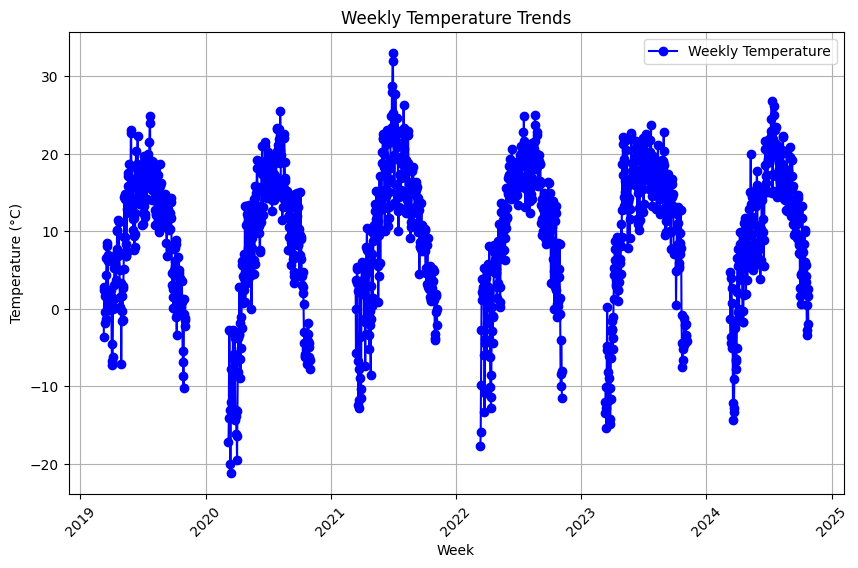

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('weatherstats_fortmcmurray_hourly.csv')

# Chuyển cột 'datetime' thành định dạng datetime
data['date_time_local'] = pd.to_datetime(data['date_time_local'], errors='coerce')

# Kiểm tra dữ liệu
print(data['date_time_local'].head())

# Đặt 'datetime' làm chỉ số và resample dữ liệu theo tuần, tính trung vị của nhiệt độ mỗi tuần
daily_data = data[['date_time_local', 'temperature']].set_index('date_time_local')
weekly_data = daily_data.resample('d').median()

# Vẽ biểu đồ nhiệt độ theo tuần
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['temperature'], marker='o', color='b', label='Weekly Temperature')
plt.title('Weekly Temperature Trends')
plt.xlabel('Week')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Giá trị thiếu trong dữ liệu:
date_time_local            0
unixtime                   0
pressure_station           1
pressure_sea               1
wind_dir                  29
wind_dir_10s               7
wind_speed                31
wind_gust              42100
relative_humidity          1
dew_point                  1
temperature                2
windchill              30839
humidex                47641
visibility                66
health_index             768
cloud_cover_4            472
cloud_cover_8          50000
cloud_cover_10         50000
solar_radiation        50000
max_air_temp_pst1hr        4
min_air_temp_pst1hr        4
dtype: int64
Giá trị thiếu trong dữ liệu đã xử lý:
temperature    0
dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\3872872013.py:14: FutureWarning: Parsed string "2024-10-25 01:00:00 MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')
C:\Users\PC\AppData\Local\Temp\ipykernel_25544\3872872013.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['temperature'] = df_cluster['temperature'].fillna(df_cluster['temperature'].mean())


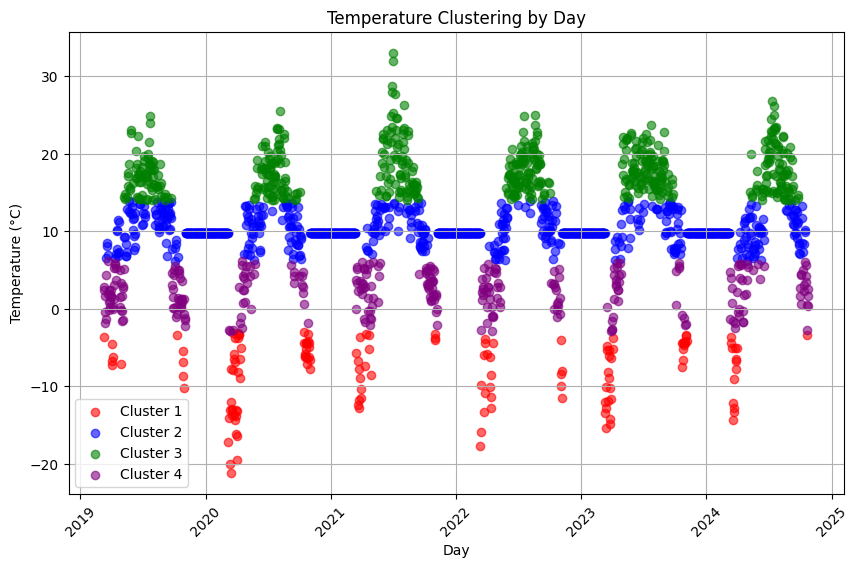

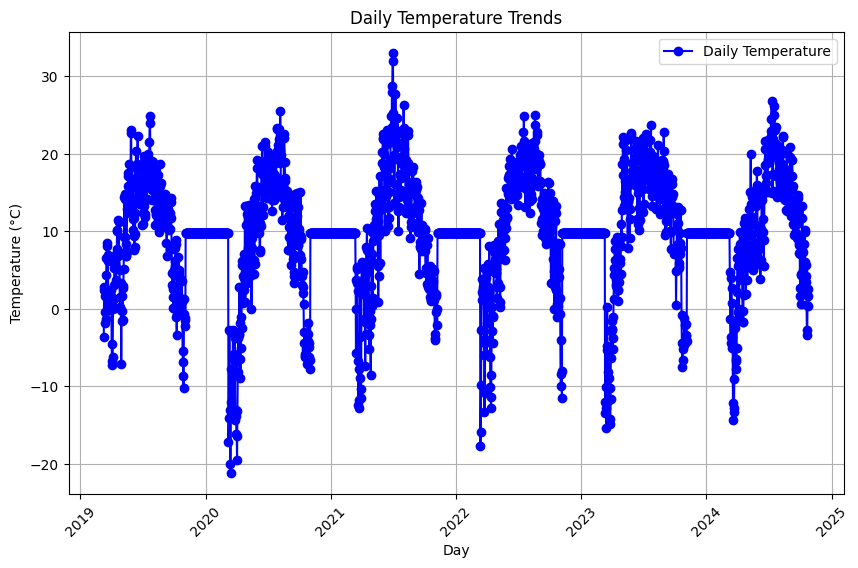

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Đọc dữ liệu từ CSV
df = pd.read_csv('weatherstats_fortmcmurray_hourly.csv')

# Kiểm tra và in ra các giá trị thiếu
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())

# Chuyển đổi cột 'date_time_local' thành định dạng datetime và xử lý các giá trị không hợp lệ
df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')

# Loại bỏ các dòng có giá trị NaT trong cột 'date_time_local' và điền giá trị thiếu cho 'temperature'
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df = df.dropna(subset=['date_time_local'])

# Chuyển đổi dữ liệu theo dạng ngày và tính nhiệt độ trung bình trong ngày
daily_data = df[['date_time_local', 'temperature']].set_index('date_time_local')
daily_data = daily_data.resample('D').median()

# Thêm cột 'half_year' để đánh dấu nửa đầu và nửa cuối năm
daily_data['half_year'] = daily_data.index.month.map(lambda x: 'H1' if x <= 6 else 'H2')

# Chuẩn bị dữ liệu phân cụm: Sử dụng nhiệt độ cho phân cụm
df_cluster = daily_data[['temperature']]
df_cluster['temperature'] = df_cluster['temperature'].fillna(df_cluster['temperature'].mean())
print("Giá trị thiếu trong dữ liệu đã xử lý:")
print(df_cluster.isnull().sum())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Vẽ biểu đồ phân cụm theo nhiệt độ hàng ngày
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    subset = df_cluster[df_cluster['cluster'] == i]
    plt.scatter(subset.index, subset['temperature'], color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.title('Temperature Clustering by Day')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Vẽ xu hướng nhiệt độ theo ngày
plt.figure(figsize=(10, 6))
plt.plot(df_cluster.index, df_cluster['temperature'], marker='o', color='b', label='Daily Temperature')
plt.title('Daily Temperature Trends')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


Giá trị thiếu trong dữ liệu:
date_time_local            0
unixtime                   0
pressure_station           1
pressure_sea               1
wind_dir                  29
wind_dir_10s               7
wind_speed                31
wind_gust              42100
relative_humidity          1
dew_point                  1
temperature                2
windchill              30839
humidex                47641
visibility                66
health_index             768
cloud_cover_4            472
cloud_cover_8          50000
cloud_cover_10         50000
solar_radiation        50000
max_air_temp_pst1hr        4
min_air_temp_pst1hr        4
dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\295058441.py:14: FutureWarning: Parsed string "2024-10-25 01:00:00 MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')


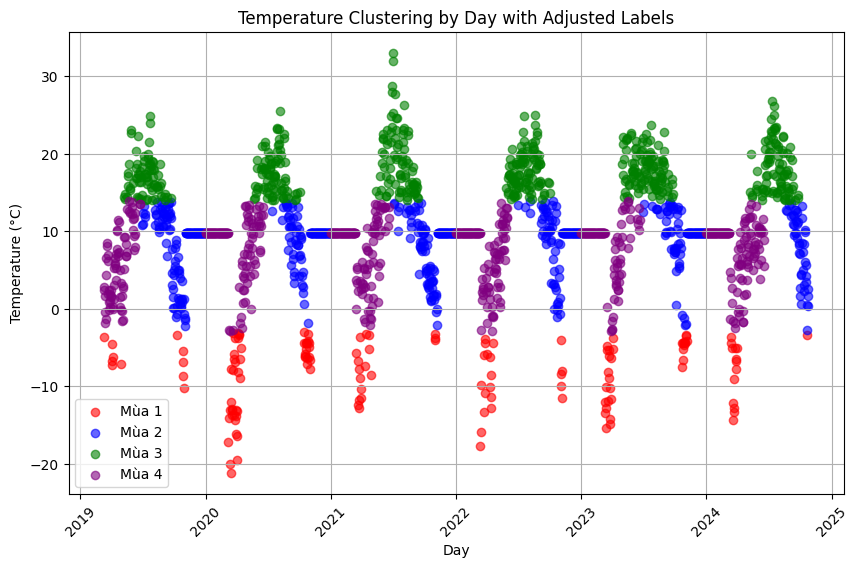

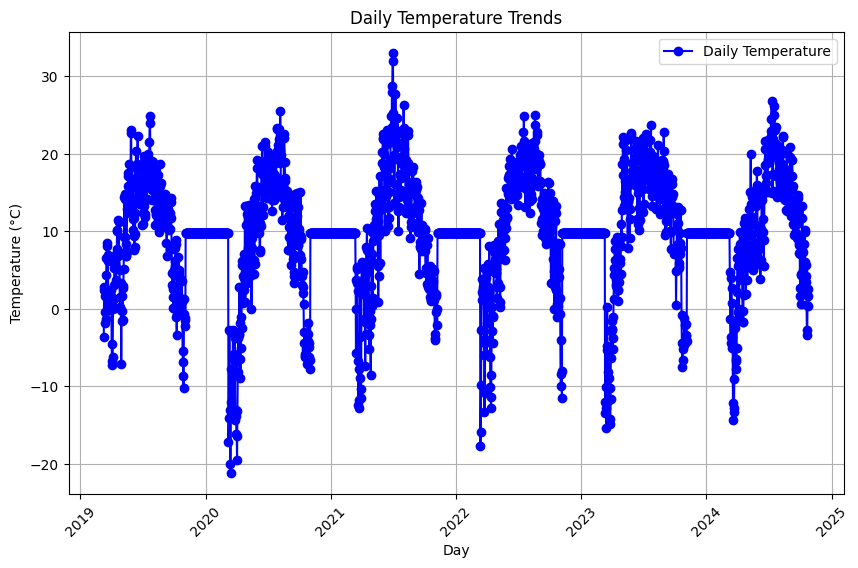

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Đọc dữ liệu từ CSV
df = pd.read_csv('weatherstats_fortmcmurray_hourly.csv')

# Kiểm tra và in ra các giá trị thiếu
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())

# Chuyển đổi cột 'date_time_local' thành định dạng datetime và xử lý các giá trị không hợp lệ
df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')

# Loại bỏ các dòng có giá trị NaT trong cột 'date_time_local' và điền giá trị thiếu cho 'temperature'
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df = df.dropna(subset=['date_time_local'])

# Chuyển đổi dữ liệu theo dạng ngày và tính nhiệt độ trung bình trong ngày
daily_data = df[['date_time_local', 'temperature']].set_index('date_time_local')
daily_data = daily_data.resample('D').median()

# Thêm cột 'half_year' để đánh dấu nửa đầu và nửa cuối năm
daily_data['half_year'] = daily_data.index.month.map(lambda x: 'H1' if x <= 6 else 'H2')

# Chuẩn bị dữ liệu phân cụm: Sử dụng nhiệt độ cho phân cụm
df_cluster = daily_data[['temperature']].copy()  # Chỉ dùng cột 'temperature' cho KMeans
df_cluster['temperature'] = df_cluster['temperature'].fillna(df_cluster['temperature'].mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[['temperature']])  # Chỉ chuẩn hóa cột nhiệt độ

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Kết hợp lại cột 'half_year' từ daily_data cho việc điều chỉnh nhãn cụm
df_cluster['half_year'] = daily_data['half_year']

# Chỉnh sửa nhãn cụm dựa trên điều kiện mùa
def adjust_cluster_label(row):
    if row['cluster'] in [1, 3]:  # Giả sử 'vàng' là 0 và 'đỏ' là 1
        if row['half_year'] == 'H1':
            return 3  # Gán là "cụm đỏ"
        else:
            return 1  # Gán là "cụm vàng"
    return row['cluster']  # Giữ nguyên cho các cụm khác

# Áp dụng điều kiện để điều chỉnh nhãn cụm
df_cluster['adjusted_cluster'] = df_cluster.apply(adjust_cluster_label, axis=1)
scatter_data = []
# Vẽ biểu đồ phân cụm theo nhiệt độ hàng ngày
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    subset = df_cluster[df_cluster['adjusted_cluster'] == i]
    for index, row in subset.iterrows():
        scatter_data.append({
            "index": index,
            "temperature": row['temperature'],
            "season": i
        })
    plt.scatter(subset.index, subset['temperature'], color=colors[i], label=f'Mùa {i+1}', alpha=0.6)
# Lưu scatter_data vào file CSV
scatter_df = pd.DataFrame(scatter_data)
scatter_df.to_csv('scatter_data.csv', index=False)
plt.title('Temperature Clustering by Day with Adjusted Labels')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Vẽ xu hướng nhiệt độ theo ngày
plt.figure(figsize=(10, 6))
plt.plot(df_cluster.index, df_cluster['temperature'], marker='o', color='b', label='Daily Temperature')
plt.title('Daily Temperature Trends')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [25]:
print(df_cluster)

                 temperature  cluster half_year  adjusted_cluster
date_time_local                                                  
2019-03-10         -3.700000        0        H1                 0
2019-03-11          2.450000        3        H1                 3
2019-03-12          2.750000        3        H1                 3
2019-03-13         -0.450000        3        H1                 3
2019-03-14         -1.850000        3        H1                 3
...                      ...      ...       ...               ...
2024-10-21         -3.350000        0        H2                 0
2024-10-22         -2.700000        3        H2                 1
2024-10-23          2.500000        3        H2                 1
2024-10-24          1.600000        3        H2                 1
2024-10-25          0.291162        3        H2                 1

[2057 rows x 4 columns]


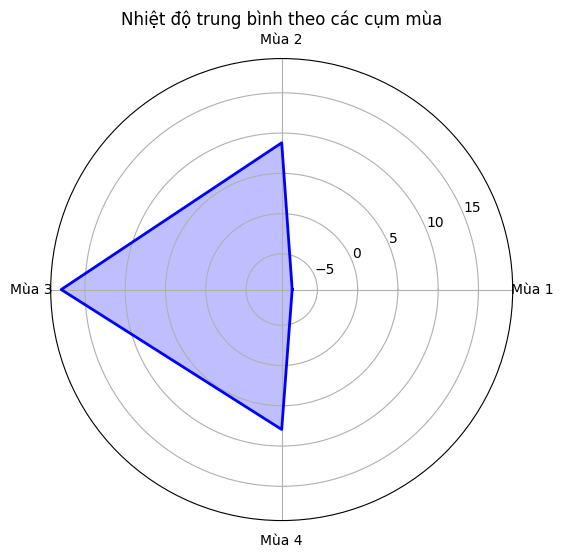

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Tính nhiệt độ trung bình cho từng cụm
avg_temperature_by_cluster = df_cluster.groupby('adjusted_cluster')['temperature'].mean()
clusters = avg_temperature_by_cluster.index
values = avg_temperature_by_cluster.values

# Chuẩn bị dữ liệu cho biểu đồ spider
num_vars = len(clusters)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Góc cho mỗi trục
values = np.concatenate((values, [values[0]]))  # Đóng vòng giá trị
angles += angles[:1]  # Đóng vòng các góc

# Vẽ biểu đồ spider
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# Thiết lập nhãn cho mỗi trục
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'Mùa {int(i)+1}' for i in clusters])

# Tiêu đề và định dạng
plt.title('Nhiệt độ trung bình theo các cụm mùa')
plt.show()


In [23]:
# Lấy tọa độ centroid của từng cụm
centroids = kmeans.cluster_centers_

# Chuyển đổi tọa độ centroid thành DataFrame để dễ lưu trữ
centroid_df = pd.DataFrame(centroids, columns=['temperature'])

# Đặt tên cho từng cụm để dễ nhận biết
centroid_df.index.name = 'Cluster'
centroid_df.reset_index(inplace=True)

# Xuất ra file CSV
centroid_df.to_csv('centroids.csv', index=False)

# In ra centroid để kiểm tra
print(centroid_df)

   Cluster  temperature
0        0    -2.435760
1        1     0.037501
2        2     1.114680
3        3    -1.022548


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Giả sử dữ liệu đã có và mô hình phân cụm đã được huấn luyện

# 1. Chuẩn bị dữ liệu và huấn luyện mô hình hồi quy tuyến tính để dự đoán
df['day'] = np.arange(len(df))  # Tạo một cột ngày để làm đầu vào dự đoán
X = df[['day']]
y = df['temperature']

# Tạo và huấn luyện mô hình hồi quy tuyến tính
reg_model = LinearRegression()
reg_model.fit(X, y)

# Dự đoán nhiệt độ của ngày mai
next_day = np.array([[X['day'].max() + 1]])
predicted_temp = reg_model.predict(next_day)[0]
print("Dự đoán nhiệt độ ngày mai:", predicted_temp)

# 2. Tính khoảng cách và xác suất
# Chuẩn hóa nhiệt độ dự đoán
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df[['temperature']])
predicted_temp_scaled = scaler.transform([[predicted_temp]])

# Lấy tọa độ centroid của từng cụm sau khi phân cụm KMeans
centroids = kmeans.cluster_centers_

# Tính khoảng cách giữa nhiệt độ dự đoán và từng centroid
distances = [np.linalg.norm(predicted_temp_scaled - centroid) for centroid in centroids]

# Chuyển đổi khoảng cách thành xác suất (sử dụng phân phối softmax)
probs = np.exp(-np.array(distances)) / np.sum(np.exp(-np.array(distances)))

# In xác suất cho từng cụm
for i, prob in enumerate(probs):
    print(f"Xác suất cho cụm {i+1}: {prob:.2f}")


Dự đoán nhiệt độ ngày mai: 7.747060651209459
Xác suất cho cụm 1: 0.07
Xác suất cho cụm 2: 0.49
Xác suất cho cụm 3: 0.17
Xác suất cho cụm 4: 0.27


d:\MiniConda\Conda\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\MiniConda\Conda\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Đọc dữ liệu từ CSV
df = pd.read_csv('weatherstats_fortmcmurray_hourly.csv')

# Kiểm tra và in ra các giá trị thiếu
print("Giá trị thiếu trong dữ liệu:")
print(df.isnull().sum())

# Chuyển đổi cột 'date_time_local' thành định dạng datetime và xử lý các giá trị không hợp lệ
df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')

# Loại bỏ các dòng có giá trị NaT trong cột 'date_time_local' và điền giá trị thiếu cho 'temperature'
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df = df.dropna(subset=['date_time_local'])

# Chuyển đổi dữ liệu theo dạng ngày và tính nhiệt độ trung bình trong ngày
daily_data = df[['date_time_local', 'temperature']].set_index('date_time_local')
daily_data = daily_data.resample('D').median()

# Thêm cột 'half_year' để đánh dấu nửa đầu và nửa cuối năm
daily_data['half_year'] = daily_data.index.month.map(lambda x: 'H1' if x <= 6 else 'H2')

# Chuẩn bị dữ liệu phân cụm: Sử dụng nhiệt độ cho phân cụm
df_cluster = daily_data[['temperature']].copy()  # Chỉ dùng cột 'temperature' cho KMeans
df_cluster['temperature'] = df_cluster['temperature'].fillna(df_cluster['temperature'].mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[['temperature']])  # Chỉ chuẩn hóa cột nhiệt độ

# Áp dụng KMeans phân cụm vào 4 cụm
kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Kết hợp lại cột 'half_year' từ daily_data cho việc điều chỉnh nhãn cụm
df_cluster['half_year'] = daily_data['half_year']

# Chỉnh sửa nhãn cụm dựa trên điều kiện mùa
def adjust_cluster_label(row):
    if row['cluster'] in [1, 3]:  # Giả sử 'vàng' là 0 và 'đỏ' là 1
        if row['half_year'] == 'H1':
            return 3  # Gán là "cụm đỏ"
        else:
            return 1  # Gán là "cụm vàng"
    return row['cluster']  # Giữ nguyên cho các cụm khác

# Áp dụng điều kiện để điều chỉnh nhãn cụm
df_cluster['adjusted_cluster'] = df_cluster.apply(adjust_cluster_label, axis=1)

# Vẽ biểu đồ phân cụm theo nhiệt độ hàng ngày

Giá trị thiếu trong dữ liệu:
date_time_local            0
unixtime                   0
pressure_station           1
pressure_sea               1
wind_dir                  29
wind_dir_10s               7
wind_speed                31
wind_gust              42100
relative_humidity          1
dew_point                  1
temperature                2
windchill              30839
humidex                47641
visibility                66
health_index             768
cloud_cover_4            472
cloud_cover_8          50000
cloud_cover_10         50000
solar_radiation        50000
max_air_temp_pst1hr        4
min_air_temp_pst1hr        4
dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_25544\3698224779.py:14: FutureWarning: Parsed string "2024-10-25 01:00:00 MDT" included an un-recognized timezone "MDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date_time_local'] = pd.to_datetime(df['date_time_local'], errors='coerce')


In [30]:
print(df_cluster['adjusted_cluster'])
print(subset.index, subset['temperature'])

date_time_local
2019-03-10    0
2019-03-11    3
2019-03-12    3
2019-03-13    3
2019-03-14    3
             ..
2024-10-21    0
2024-10-22    1
2024-10-23    1
2024-10-24    1
2024-10-25    1
Freq: D, Name: adjusted_cluster, Length: 2057, dtype: int64
DatetimeIndex(['2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
               '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
               '2019-03-19', '2019-03-20',
               ...
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-15', '2024-06-16',
               '2024-06-17', '2024-06-18'],
              dtype='datetime64[ns]', name='date_time_local', length=732, freq=None) date_time_local
2019-03-11     2.45
2019-03-12     2.75
2019-03-13    -0.45
2019-03-14    -1.85
2019-03-15     1.60
              ...  
2024-06-10    10.25
2024-06-15    11.60
2024-06-16     9.95
2024-06-17     5.55
2024-06-18     8.80
Name: temperature, Length: 732, dtype